In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import pandas as pd
uncleaned_ships_data = pd.read_csv('data/Ship_Uncleaned.csv')
port_locations_data = pd.read_csv('data/Port_locations.csv')
cleaned_ships_data = pd.read_csv('data/Cleaned_ships_data.csv')


In [4]:
# Check information about the uncleaned ship data
uncleaned_ships_data.info()

# Check information about the port locations data
port_locations_data.info()

# Check information about the cleaned ship data
cleaned_ships_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  4000 non-null   object
 1   ship_name     4000 non-null   object
 2   built_year    4000 non-null   int64 
 3   gt            4000 non-null   int64 
 4   dwt           4000 non-null   int64 
 5   size          4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    5856 non-null   object
 1   port_name  5856 non-null   object
 2   locode     5856 non-null   object
dtypes: object(3)
memory usage: 137.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------      

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('/kaggle/input/global-cargo-ships-dataset/Cleaned_ships_data.csv')


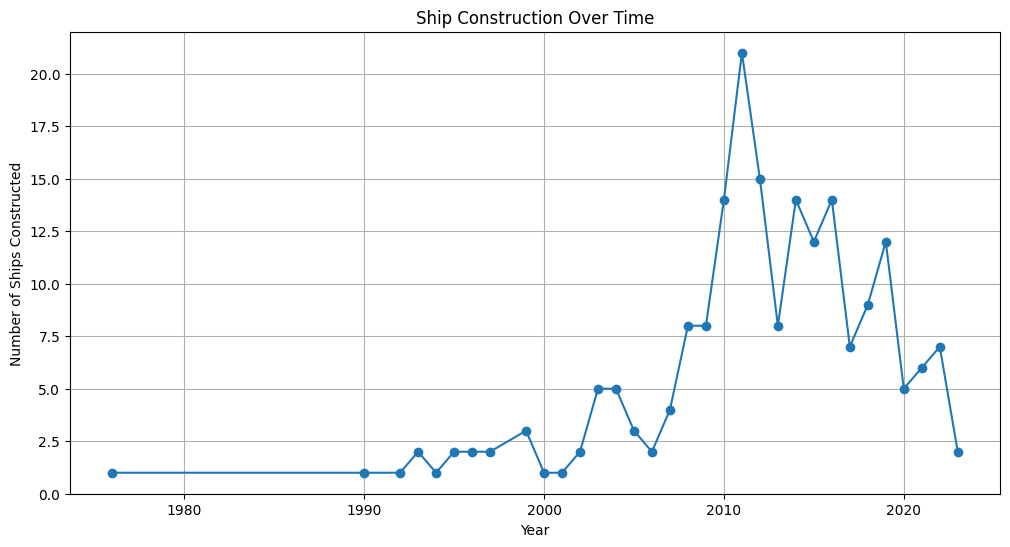

In [6]:
df['built_year'] = pd.to_datetime(df['built_year'], format='%Y')

# Time Series Visualization
# Group data by year and count the number of ships constructed each year
year_counts = df['built_year'].dt.year.value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title('Ship Construction Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ships Constructed')
plt.grid(True)
plt.show()

In [7]:

# Ensure the 'built_year' column is in datetime format
df['built_year'] = pd.to_datetime(df['built_year'], format='%Y')

# Group data by year and count the number of ships constructed each year
year_counts = df['built_year'].dt.year.value_counts().sort_index()

# Create an interactive line plot using Plotly Express
fig = px.line(x=year_counts.index, y=year_counts.values, markers=True, labels={'x':'Year', 'y':'Number of Ships Constructed'})
fig.update_layout(title='Ship Construction Over Time', xaxis_title='Year', yaxis_title='Number of Ships Constructed')

# Display the interactive plot
fig.show()

Correlation between ship length and GT: 0.8097912513253649
Correlation between ship length and DWT: 0.3801043678877674


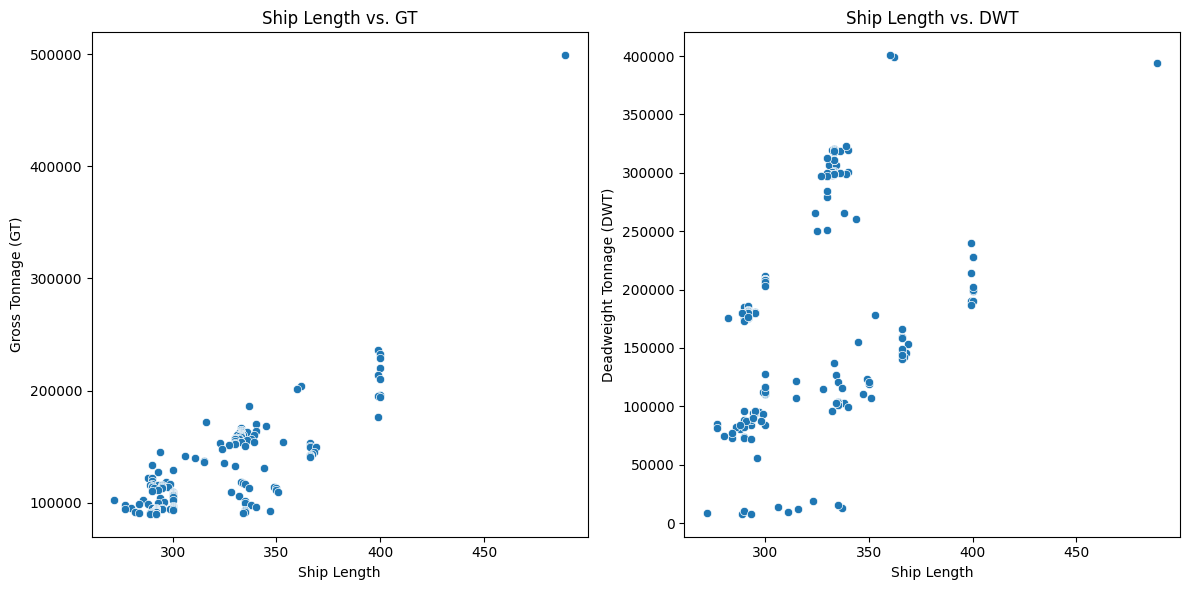

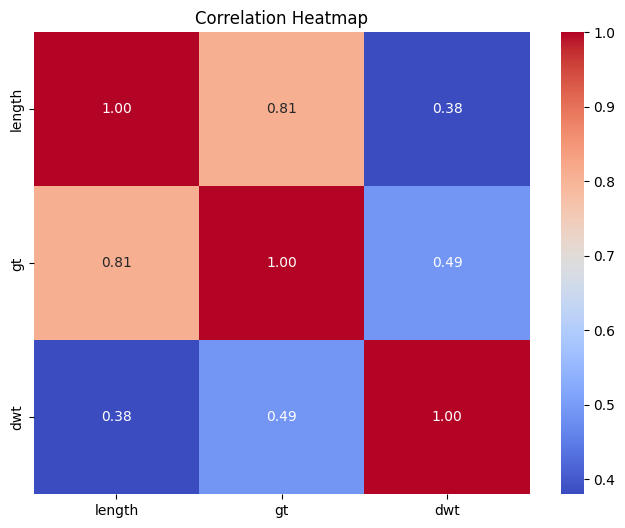

In [8]:
# Correlation Analysis
correlation_gt = df['length'].corr(df['gt'])
correlation_dwt = df['length'].corr(df['dwt'])

print(f"Correlation between ship length and GT: {correlation_gt}")
print(f"Correlation between ship length and DWT: {correlation_dwt}")

# Visualization
plt.figure(figsize=(12, 6))

# Scatterplot for ship length vs. GT
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='length', y='gt')
plt.title('Ship Length vs. GT')
plt.xlabel('Ship Length')
plt.ylabel('Gross Tonnage (GT)')

# Scatterplot for ship length vs. DWT
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='length', y='dwt')
plt.title('Ship Length vs. DWT')
plt.xlabel('Ship Length')
plt.ylabel('Deadweight Tonnage (DWT)')

plt.tight_layout()

# Correlation Heatmap
correlation_matrix = df[['length', 'gt', 'dwt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The ship length is more strongly related to Gross Tonnage (GT) than to Deadweight Tonnage (DWT). The positive correlations indicate that, in general, larger ships tend to have higher GT and DWT values.